In [5]:
%matplotlib inline
%load_ext autoreload
%autoreload 2

import numpy as np
import cv2
print('OpenCV version used:', cv2.__version__)

from skimage import io
from matplotlib import pyplot as plt
import matplotlib as mpl
mpl.rcParams['figure.figsize'] = (10,10)

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload
OpenCV version used: 4.1.0


# Affine Transformation: Task 1.2
- Given 3 pairs of points ﬁnd afﬁne transformation and apply it to an image.
- Compare with OpenCV function

downloading https://raw.githubusercontent.com/ucuapps/computer-vision-course/master/module4-geometry/practice2_homography/img/view.jpg


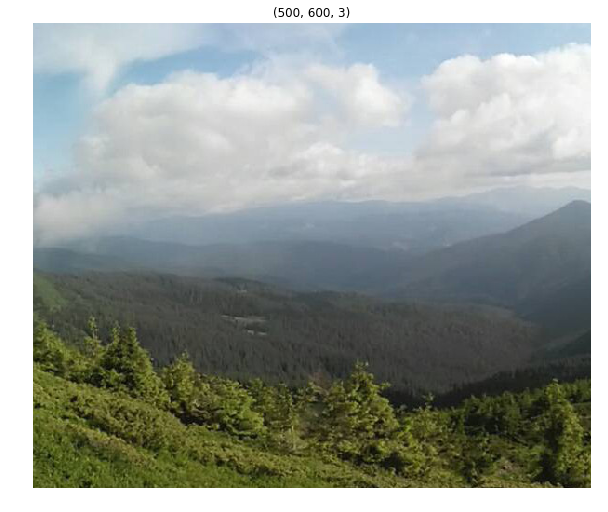

In [6]:
def url_to_image(url):
    print("downloading %s" % (url))
    return io.imread(url)

def imshow(img, cmap='gray', sub=None, title=None, ax='off'):
    if sub is not None:
        plt.subplot(*sub)
    if title is None:
        title = img.shape
    plt.title(title)
    plt.imshow(img, cmap=cmap)
    plt.grid(False)
    plt.axis(ax)
    if sub is None:
        plt.show()

url = "https://raw.githubusercontent.com/ucuapps/computer-vision-course/master/module4-geometry/practice2_homography/img/view.jpg"
img = url_to_image(url)[:500,:,:]
imshow(img)

In [7]:
# Synthesize point correspondences {x1 <-> x2}

(h, w) = img.shape[:2]

x1 = np.float32([[0, 0],
                 [w, 0],
                 [0, h]])

x2 = np.float32([[50 ,0],
                 [w, 50],
                 [0, h - 50]])

[[ 0.91666667 -0.1        50.        ]
 [ 0.08333333  0.9         0.        ]]


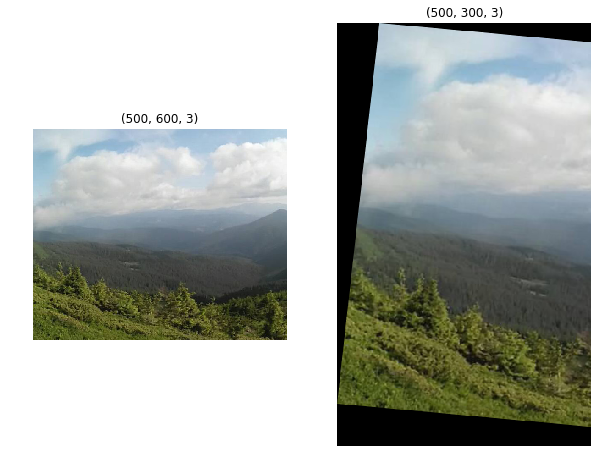

In [9]:
# Get affine transformation with OpenCV

A = cv2.getAffineTransform(x1, x2)
print(A)

dst = cv2.warpAffine(img, A, (w,h))
imshow(img, sub=(1,2,1))
imshow(dst, sub=(1,2,2))
plt.show()

In [68]:
def getAffineTransform(x1, x2):
    ########### please implement me ###########
    A = np.array([x1])
    ###########################################

[[ 0.91666667 -0.1        50.        ]
 [ 0.08333333  0.9         0.        ]]


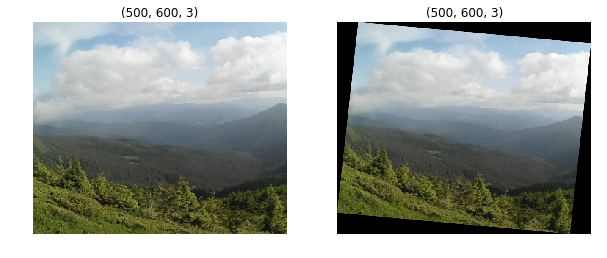

In [70]:
A2 = getAffineTransform(x1, x2)
print(A2)

assert(np.linalg.norm(A2 - A, 'fro') < 1e-12)

dst = cv2.warpAffine(img, A2, (w,h))
imshow(img, sub=(1,2,1))
imshow(dst, sub=(1,2,2))
plt.show()

# Projective Transformation: Task 2.2
- Given 4 pairs of points find projective transformation and apply it to an image. 
- Compare with OpenCV function

downloading https://raw.githubusercontent.com/ucuapps/computer-vision-course/master/module4-geometry/practice2_homography/img/cvbook.jpg


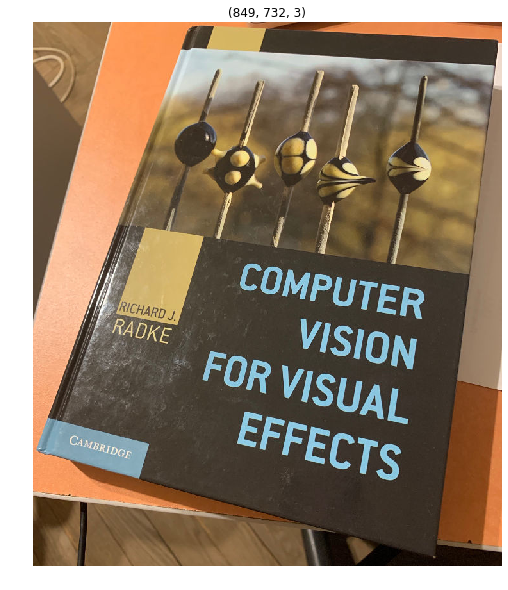

In [10]:
url = "https://raw.githubusercontent.com/ucuapps/computer-vision-course/master/module4-geometry/practice2_homography/img/cvbook.jpg"
img = url_to_image(url)
imshow(img)

In [72]:
# Get point correspondences {x1 <-> x2}

x1 = np.float32([[241, 6],
                 [726, 29],
                 [6, 668],
                 [627, 837]])

x2 = np.float32([[0, 0],
                 [300, 0],
                 [0, 400],
                 [300, 400]])

[[ 7.53496708e-01  2.67479949e-01 -1.83197586e+02]
 [-3.99227991e-02  8.41850329e-01  4.57029261e+00]
 [ 3.03922821e-04  6.21097907e-04  1.00000000e+00]]


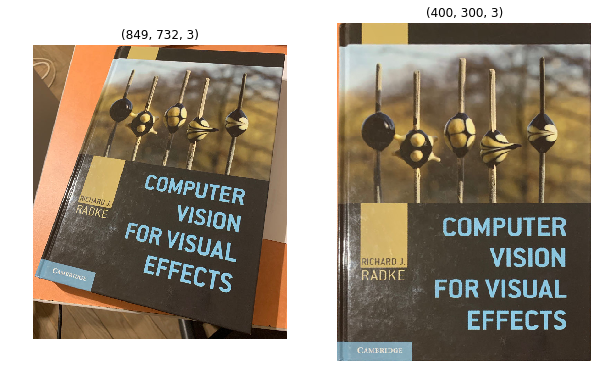

In [73]:
# Get homography with OpenCV

H = cv2.getPerspectiveTransform(x1, x2)
H /= H[2,2]
print(H)

dst = cv2.warpPerspective(img, H, (300,400))
imshow(img, sub=(1,2,1))
imshow(dst, sub=(1,2,2))
plt.show()

In [74]:
def getPerspectiveTransform(x1,x2):
    ########### please implement me ###########
    pass
    ###########################################

[[ 7.53496708e-01  2.67479949e-01 -1.83197586e+02]
 [-3.99227991e-02  8.41850329e-01  4.57029261e+00]
 [ 3.03922821e-04  6.21097907e-04  1.00000000e+00]]


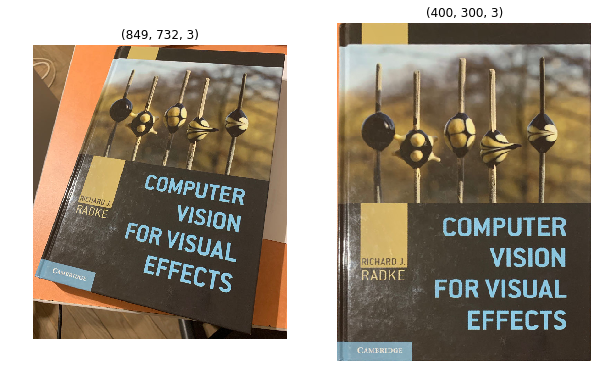

In [88]:
H2 = getPerspectiveTransform(x1, x2)
H2 /= H2[2,2]
print(H2)
assert(np.linalg.norm(H2 - H, 'fro') < 1e-12)

dst = cv2.warpPerspective(img, H2, (300, 400))
imshow(img, sub=(1,2,1))
imshow(dst, sub=(1,2,2))
plt.show()

# Correspondence and Matching: Task 3.1

downloading https://raw.githubusercontent.com/ucuapps/computer-vision-course/master/module4-geometry/practice2_homography/img/bookflat.jpg
downloading https://raw.githubusercontent.com/ucuapps/computer-vision-course/master/module4-geometry/practice2_homography/img/cvbook.jpg


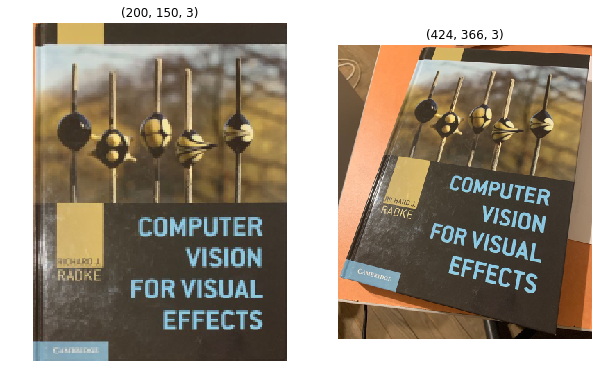

In [90]:
url1 = "https://raw.githubusercontent.com/ucuapps/computer-vision-course/master/module4-geometry/practice2_homography/img/bookflat.jpg"
url2 = "https://raw.githubusercontent.com/ucuapps/computer-vision-course/master/module4-geometry/practice2_homography/img/cvbook.jpg"
img1 = cv2.resize(url_to_image(url1), (0,0), fx=0.5, fy=0.5)
img2 = cv2.resize(url_to_image(url2), (0,0), fx=0.5, fy=0.5)
imshow(img1, sub=(1,2,1))
imshow(img2, sub=(1,2,2))
plt.show()

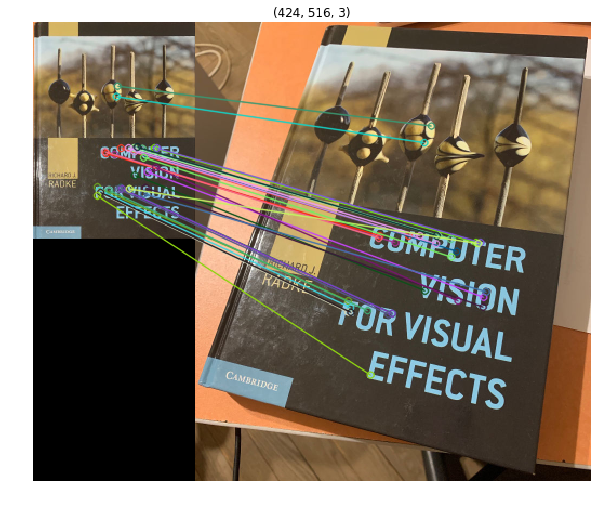

In [91]:
# 

orb = cv2.ORB_create()
# find the keypoints and descriptors with ORB
# because SIFT and SUFT are patented (Anticipated expiration 2020-03-06)
kp1, des1 = orb.detectAndCompute(img1, None)
kp2, des2 = orb.detectAndCompute(img2, None)

# create BFMatcher object (Brute-force descriptor matcher)
bf = cv2.BFMatcher(cv2.NORM_HAMMING, crossCheck=True)

# Match descriptors.
matches = bf.match(des1,des2)

# Sort them in the order of their distance.
matches = sorted(matches, key = lambda x:x.distance)

# Draw first 30 matches.
img3 = cv2.drawMatches(img1, kp1, img2, kp2, matches[:30], None, flags=2)

imshow(img3)

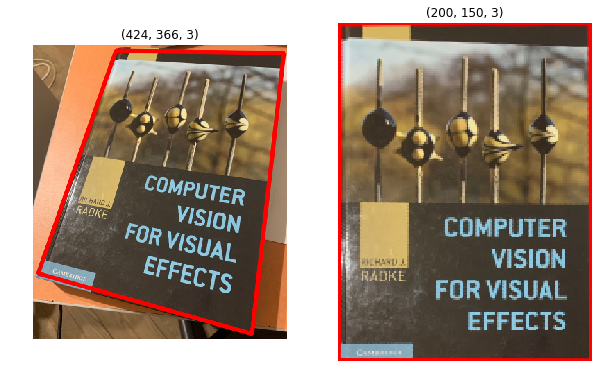

In [99]:
# Get homography with OpenCV

if len(matches)>4:
    src_pts = np.float32([ kp1[m.queryIdx].pt for m in matches ]).reshape(-1,1,2)
    dst_pts = np.float32([ kp2[m.trainIdx].pt for m in matches ]).reshape(-1,1,2)

    H, mask = cv2.findHomography(src_pts, dst_pts, cv2.RANSAC,5.0)
    matchesMask = mask.ravel().tolist()

    h,w = img1.shape[:2]
    pts = np.float32([ [0,0],[0,h-1],[w-1,h-1],[w-1,0] ]).reshape(-1,1,2)
    dst = cv2.perspectiveTransform(pts, H)

    img4 = cv2.polylines(img2, [np.int32(dst)],True,255,3, cv2.LINE_AA)
    img4_rectified = cv2.warpPerspective(img4, np.linalg.inv(H), (150, 200))
    imshow(img4, sub=(1,2,1))
    imshow(img4_rectified, sub=(1,2,2))
    plt.show()

else:
    print("Not enough matches are found - %d/%d" % (len(matches), MIN_MATCH_COUNT))
    matchesMask = None

In [101]:
def findHomography(x1, x2):
    ########### please implement me ###########
    pass
    ###########################################

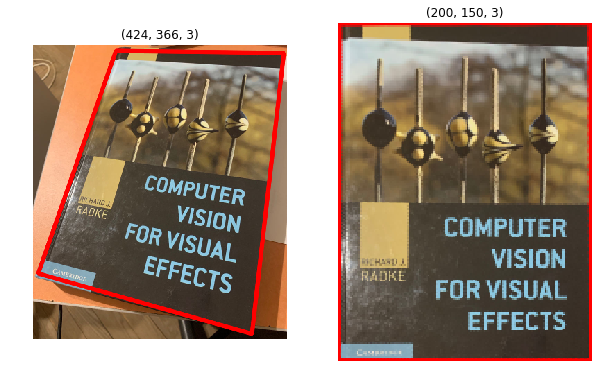

In [100]:
if len(matches)>4:
    src_pts = np.float32([ kp1[m.queryIdx].pt for m in matches ]).reshape(-1,1,2)
    dst_pts = np.float32([ kp2[m.trainIdx].pt for m in matches ]).reshape(-1,1,2)

    H, mask = findHomography(src_pts, dst_pts)
    matchesMask = mask.ravel().tolist()

    h,w = img1.shape[:2]
    pts = np.float32([ [0,0],[0,h-1],[w-1,h-1],[w-1,0] ]).reshape(-1,1,2)
    dst = cv2.perspectiveTransform(pts, H)

    img4 = cv2.polylines(img2, [np.int32(dst)],True,255,3, cv2.LINE_AA)
    img4_rectified = cv2.warpPerspective(img4, np.linalg.inv(H), (150, 200))
    imshow(img4, sub=(1,2,1))
    imshow(img4_rectified, sub=(1,2,2))
    plt.show()

else:
    print("Not enough matches are found - %d/%d" % (len(matches), MIN_MATCH_COUNT))
    matchesMask = None